In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statistics as st
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso , RidgeClassifier,ElasticNet
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, fbeta_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('training_data.csv', index_col=0) 

In [3]:
df_original = df.copy()

In [4]:
df_original

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
73713,5c890971-a6d7-44ce-a8a1-3b38cda7ef3b,Female,70.0,1,0,never,55.57,6.2,130,1
73714,13a8f177-1623-4acf-9db8-1e8ac8577c86,Male,60.0,0,0,No Info,27.32,6.6,160,0
73715,c9539d1b-075f-481f-8ae4-ab9bba75af5b,Male,65.0,0,0,former,32.07,5.0,160,0
73716,08eb5a8d-f577-440a-9408-c6d99ca17204,Male,64.0,0,0,current,30.23,6.2,158,0


<AxesSubplot:xlabel='gender', ylabel='count'>

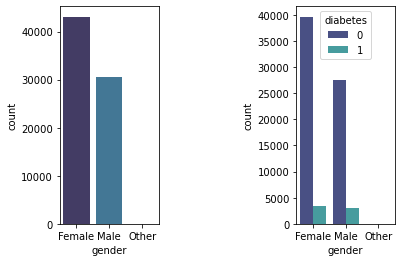

In [5]:
sns.countplot(data=df,x='gender',axes=plt.subplot(1,3,1),palette='mako')
sns.countplot(data=df,x='gender',hue='diabetes',axes=plt.subplot(1,3,3),palette='mako')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

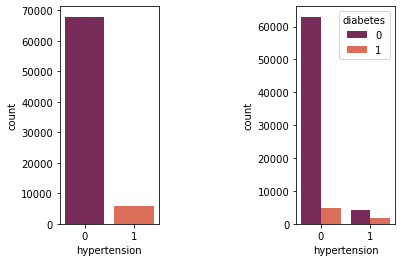

In [6]:
sns.countplot(data=df,x='hypertension',axes=plt.subplot(1,3,1),palette='rocket')
sns.countplot(data=df,x='hypertension',hue='diabetes',axes=plt.subplot(1,3,3),palette='rocket')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

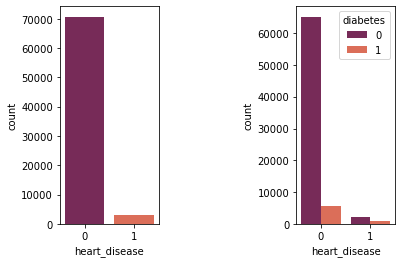

In [7]:
sns.countplot(data=df,x='heart_disease',axes=plt.subplot(1,3,1),palette='rocket')
sns.countplot(data=df,x='heart_disease',hue='diabetes',axes=plt.subplot(1,3,3),palette='rocket')

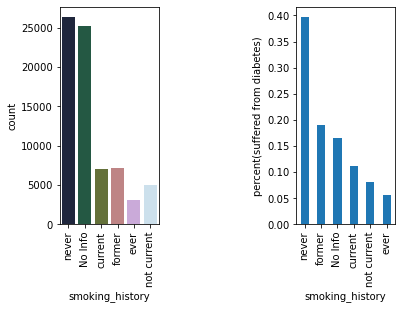

In [8]:
sns.countplot(data=df,x='smoking_history',axes=plt.subplot(1,3,1),palette='cubehelix')
plt.xticks(rotation=90)
# sns.countplot(df,x='smoking_status',hue='stroke',axes=plt.subplot(1,3,3),palette='cubehelix')
plt.subplot(1,3,3)
df['smoking_history'][df['diabetes']==1].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("smoking_history")
plt.ylabel("percent(suffered from diabetes)")
plt.xticks(rotation=90)
plt.show()

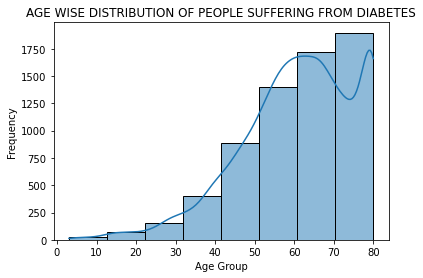

In [9]:
sns.histplot(df[df['diabetes']==1],x='age',bins=8,palette='flare',kde=True)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("AGE WISE DISTRIBUTION OF PEOPLE SUFFERING FROM DIABETES")
plt.show()

<AxesSubplot:xlabel='bmi'>

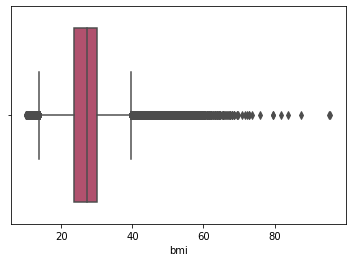

In [10]:
sns.boxplot(data = df,x='bmi',palette='flare')


<AxesSubplot:xlabel='HbA1c_level'>

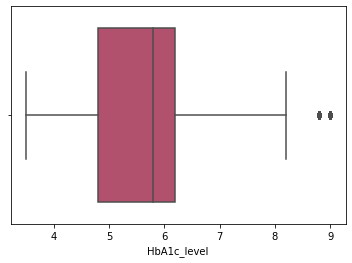

In [11]:
sns.boxplot(data=df,x='HbA1c_level',palette='flare')

<AxesSubplot:xlabel='blood_glucose_level'>

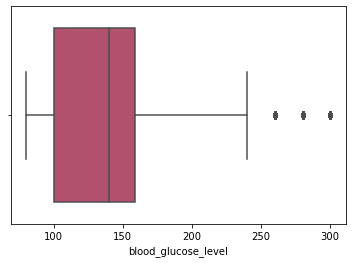

In [12]:
sns.boxplot(data=df,x='blood_glucose_level',palette='flare')

In [13]:
df = df.drop(columns=['ID', 'gender', 'smoking_history'])
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [14]:
# numerical_columns=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# for i in numerical_columns:
#     q1,q3=np.quantile(df[i],q=[0.25,0.75])
#     IQR=q3-q1
#     lower_bound = q1 - (1.5 * IQR)
#     upper_bound = q3 + (1.5 * IQR)
#     df[i]=np.clip(df[i],lower_bound,upper_bound)

In [15]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
73713,70.0,1,0,55.57,6.2,130,1
73714,60.0,0,0,27.32,6.6,160,0
73715,65.0,0,0,32.07,5.0,160,0
73716,64.0,0,0,30.23,6.2,158,0


In [16]:
#df['smoking_history'].value_counts()

In [17]:
# df.loc[df['smoking_history'] == 'never', 'smoking_history'] = 'ever'

# # Drop "No Info" row
# df = df[df['smoking_history'] != 'No Info']

# # Add "former" and "not current" rows
# df.loc[df['smoking_history'] == 'not current', 'smoking_history'] = 'former'

# df = df[df['gender'] != 'Other']

# # Perform one-hot encoding
# df = pd.get_dummies(df, columns=['gender'])
# df.head()

In [18]:
# df = pd.get_dummies(df, columns=['smoking_history'])
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
73713,70.0,1,0,55.57,6.2,130,1
73714,60.0,0,0,27.32,6.6,160,0
73715,65.0,0,0,32.07,5.0,160,0
73716,64.0,0,0,30.23,6.2,158,0


In [19]:
features = [x for x in df.columns if x!= 'diabetes']
features

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[features]
y = df['diabetes']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (55288, 6)
X_test_shape: (18430, 6)
y_train_shape: (55288,)
y_test_shape: (18430,)


In [21]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a StandardScaler object
scaler = StandardScaler()
scaler.fit(X_train[columns_to_scale])

# Fit and transform the selected columns
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [22]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
51922,-1.323372,0,0,-0.001454,0.525357,-0.931866
20503,0.230298,0,0,-0.001454,-0.501021,-0.199945
44012,-1.722887,0,0,-1.907665,0.991892,-0.199945
60022,-0.835076,0,0,1.638568,0.152129,0.166015
27693,1.473233,0,0,-0.001454,0.432050,0.483180
...,...,...,...,...,...,...
37194,-0.080436,0,0,-0.973045,0.618664,-1.175839
6265,-1.367762,0,0,-1.560140,-1.900627,0.409988
54886,-1.234591,0,0,-1.067690,0.432050,-1.175839
860,-0.790685,0,0,-0.001454,0.618664,0.409988


<AxesSubplot:>

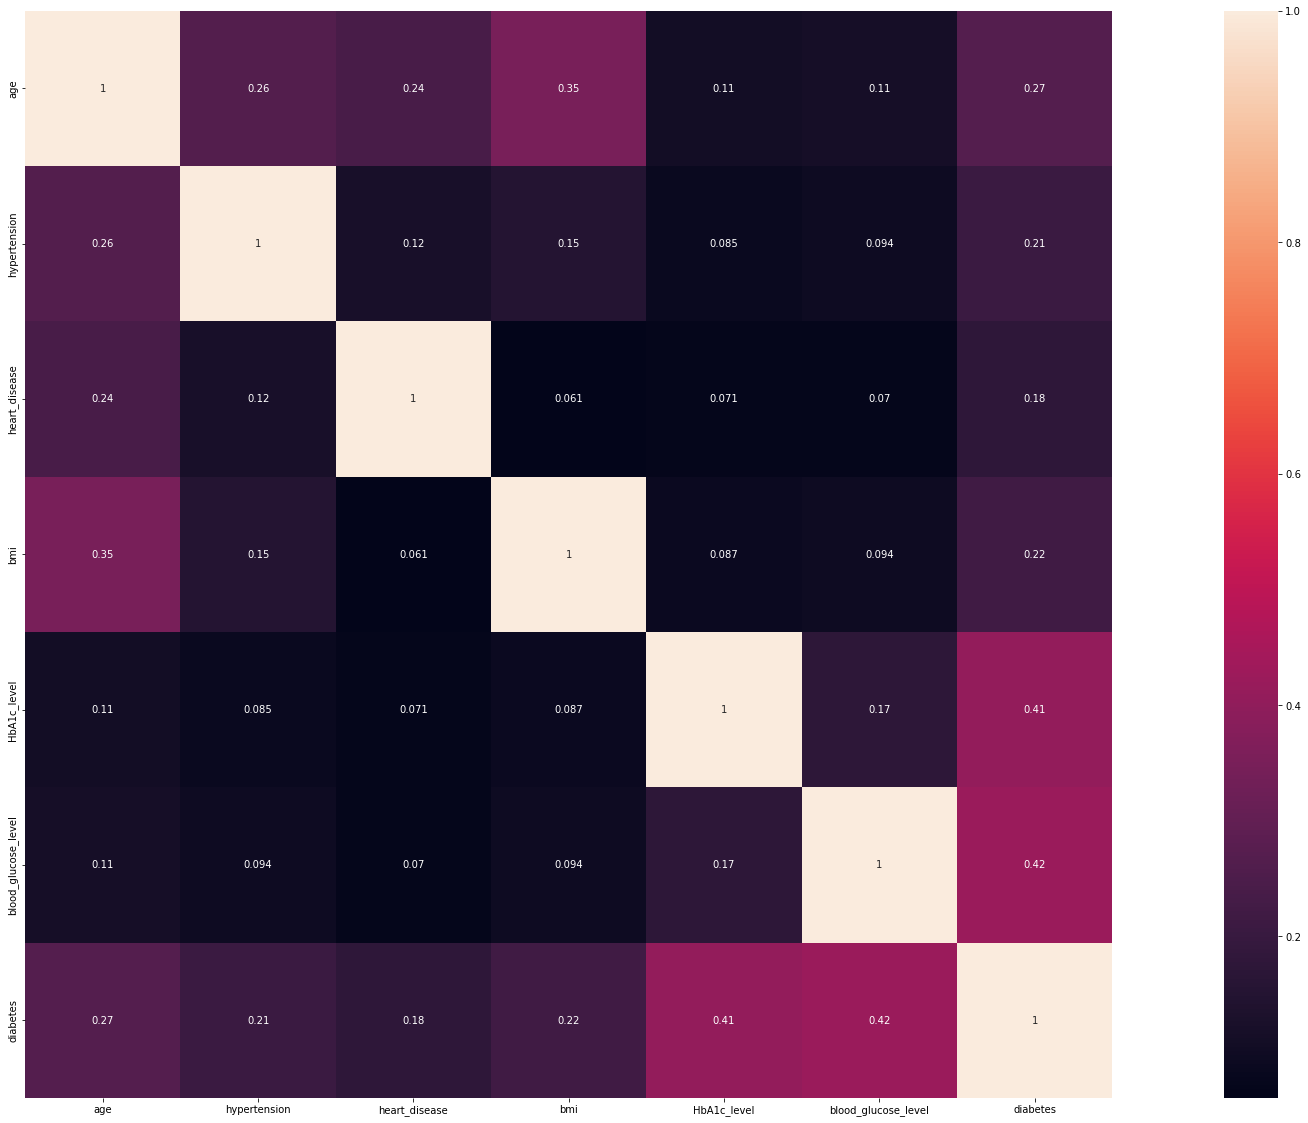

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.concat([X_train, y_train], axis=1)
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(train.corr(), annot=True, square=True, ax=ax)

### Other simple classifiers

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)
print("AUC-ROC:", auc_roc_rf)


Random Forest Evaluation Metrics:
Confusion Matrix:
[[16741   106]
 [  441  1142]]
Precision: 0.9150641025641025
Recall: 0.7214150347441567
F1 Score: 0.8067820558106675
AUC-ROC: 0.8575615566669084


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)
auc_roc_logreg = roc_auc_score(y_test, y_pred_logreg)

print("Logistic Regression Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_score_logreg)
print("AUC-ROC:", auc_roc_logreg)

# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calculate evaluation metrics for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)

print("SVM Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_score_svm)
print("AUC-ROC:", auc_roc_svm)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calculate evaluation metrics for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_pred_dt)

print("Decision Tree Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_score_dt)
print("AUC-ROC:", auc_roc_dt)

In [ ]:
for i in range(1,10):
    KNN=KNeighborsClassifier(n_neighbors=i)
    cross_validation=cross_val_score(KNN,X_resampled,y_resampled,cv=5,n_jobs=3,scoring='recall')
    print(i," = ",np.mean(cross_validation))

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_resampled, y_resampled)
y_pred_KNN = KNN.predict(X_test)

# Calculate evaluation metrics for Decision Tree
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_score_KNN = f1_score(y_test, y_pred_KNN)
auc_roc_KNN = roc_auc_score(y_test, y_pred_KNN)

print("KNN Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_KNN)
print("Precision:", precision_KNN)
print("Recall:", recall_KNN)
print("F1 Score:", f1_score_KNN)
print("AUC-ROC:", auc_roc_KNN)

In [ ]:
!pip install hyperopt

### Balancing data


<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='target'>

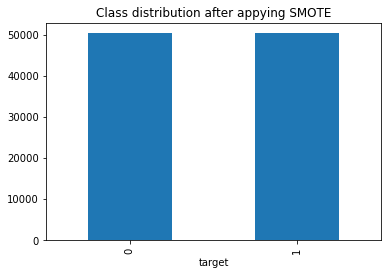

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='target')


### Hyperopt from towardsdatascience

In [31]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np 

algorithm=tpe.suggest

# redefine the function usng a wider range of hyperparameters
def objective(search_space):
    model = RandomForestClassifier(**search_space, random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}
# new search space
search_space={'n_estimators':hp.randint('n_estimators',200,1000),
              
              'max_depth': hp.randint('max_depth',10,200),           
            
            'min_samples_split':hp.uniform('min_samples_split',0,1),   
             'min_samples_leaf':hp.randint('min_samples_leaf',1,10),
              
               #'criterion':hp.choice('criterion'['gini','entropy']),
                
           'max_features':hp.choice('max_features',['sqrt', 'log2']) }
# implement Hyperopt
best_params = fmin(
  fn=objective,
  space=search_space,
  algo=algorithm,
  max_evals=50)




100%|████████████████████████████████████████████████| 50/50 [19:46<00:00, 23.73s/trial, best loss: -0.905391903445528]


In [32]:
space_eval(search_space, best_params)


{'max_depth': 140,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 0.018901117548697208,
 'n_estimators': 343}

### For checking the best parameters

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

x = {'max_depth': 140,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 0.018901117548697208,
 'n_estimators': 343}

# x = {'max_depth': 181,
#  'max_features': 'log2',
#  'min_samples_leaf': 7,
#  'min_samples_split': 0.010122864677407487,
#  'n_estimators': 454}


rf_classifier = RandomForestClassifier(**x)

rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Evaluation Metrics:")
print("Confusion Matrix:")
print(cm_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)
print("AUC-ROC:", auc_roc_rf)

Random Forest Evaluation Metrics:
Confusion Matrix:
[[15262  1585]
 [  152  1431]]
Precision: 0.4744694960212202
Recall: 0.9039797852179406
F1 Score: 0.6223091976516634
AUC-ROC: 0.9049488764043048


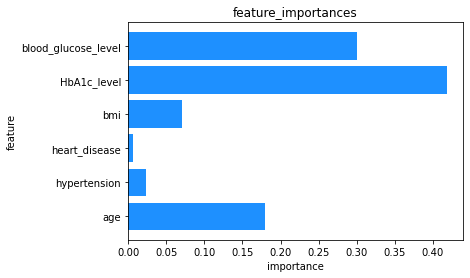

In [34]:
feature_importance = rf_classifier.feature_importances_
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(13)

feature = X_train.columns.values.tolist()
#importance = sorted(rf_classifier.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, feature_importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [35]:
print(feature_importance)

[0.18019171 0.02416275 0.00695278 0.07013458 0.41836385 0.30019433]


In [ ]:
X_train.head(1)

### Hyperopt from Zhasik

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from scipy.stats import randint
# from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
# from sklearn.model_selection import StratifiedKFold

# results = list()



# def score(params):
#     params['n_estimators'] = int(params['n_estimators'])
#     params['max_depth'] = int(params['max_depth'])
#     params['min_samples_split'] = int(params['min_samples_split'])
#     params['min_samples_leaf'] = int(params['min_samples_leaf'])
    

#     kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#     # Выполнение кросс-валидации

#     model = RandomForestClassifier(**params, random_state=12345)
#     scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)

#     result = params.copy()
#     result['test-auc-mean'] = scores.mean()
#     result['test-auc-std'] = scores.std()
#     results.append(result)

#     return {'loss': -scores.mean(), 'status': STATUS_OK}

# def optimize():
#     space = {
#     'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
#     'max_depth': hp.quniform('max_depth', 1, 10, 1),
#     'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
#     'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
#     }
#     trials = Trials()
#     best_parameters = fmin(fn=score, space=space, algo=tpe.suggest, trials=trials, max_evals=10)

#     print("Best parameters:")
#     print(best_parameters)
#     print("Best result: {0}\n".format(min(trials.losses())))

#     return best_parameters



In [ ]:
best_params = optimize()

In [ ]:
results

In [ ]:
# Конвертация результатов в pandas dataframe
df_results = pd.DataFrame.from_records(results)

# Сортируем по убыванию метрики на тесте
df_results = df_results.sort_values(by=['test-auc-mean'], ascending=False)
df_results = df_results.reset_index(drop=True)

# Создадим доп поля по разнице метрик на train и test данных
# df_results['delta_mean'] = df_results['test-auc-mean'] - df_results['train-auc-mean']
# df_results['delta_std'] = df_results['test-auc-std'] - df_results['train-auc-std']

df_results = df_results.drop_duplicates(ignore_index=True)
df_results.head(20)

### Threshold Selection

In [36]:
# Обучим модель с выбранными параметрами
rf_classifier = RandomForestClassifier(**x
)
rf_classifier.fit(X_resampled, y_resampled)
y_pred_proba = pd.Series(rf_classifier.predict_proba(X_test)[:,1])
y_pred_proba


0        0.120682
1        0.518256
2        0.027577
3        0.059182
4        0.115820
           ...   
18425    0.016321
18426    0.512540
18427    0.059036
18428    0.987126
18429    0.441582
Length: 18430, dtype: float64

In [37]:
y = df_original['diabetes']
print(y.mean())
print()
print(y.value_counts())

0.08885211210287854

0    67168
1     6550
Name: diabetes, dtype: int64


In [38]:
top_n = int(y.mean() * y_pred_proba.shape[0])
top_n

1637

In [39]:
y_pred_proba.sort_values(ascending=False).head(top_n)

2368     1.000000
12931    1.000000
6287     1.000000
9355     1.000000
13993    1.000000
           ...   
8176     0.690086
212      0.690061
8239     0.689928
6935     0.689760
2596     0.689714
Length: 1637, dtype: float64

In [40]:
thd = y_pred_proba.sort_values(ascending=False).head(top_n).iloc[-1]
thd

0.6897140817307944

In [ ]:
# Конвертируем в ответы с учетом нового порога
y_pred[y_pred >= thd] = 1
y_pred[y_pred < thd] = 0
y_pred = y_pred.astype(int)
y_pred

In [ ]:
y_test.value_counts()

In [41]:
# Создадим пустой датафрейм с необходимыми признаками
report = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1-score', 'AUC', 'Pred Ones'])
thds = np.arange(0, 1.01, 0.01)

for thd in thds:
    y_pred = y_pred_proba.apply(lambda x: 1 if x >= thd else 0)
#     y_val[y_pred > 0]
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    pred_ones = y_pred.sum()
    new_row = {'Threshold': thd, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc, 'Pred Ones': pred_ones}
    report = pd.concat([report, pd.DataFrame(new_row, index=[0])], ignore_index=True)


In [42]:
pd.set_option('display.max_rows', None)

report

,Threshold,Precision,Recall,F1-score,AUC,Pred Ones
0,0.0,0.085893,1.0,0.158197,0.5,18430
1,0.01,0.113096,1.0,0.203209,0.631566,13997
2,0.02,0.124823,1.0,0.221942,0.670594,12682
3,0.03,0.146265,0.999368,0.255182,0.725629,10816
4,0.04,0.165584,0.998105,0.284045,0.762749,9542
5,0.05,0.178386,0.996841,0.302618,0.782715,8846
6,0.06,0.193287,0.993051,0.32359,0.801802,8133
7,0.07,0.205693,0.990524,0.340647,0.815557,7623
8,0.08,0.21622,0.988629,0.354835,0.825946,7238
9,0.09,0.226128,0.987366,0.367981,0.834931,6912


# Описание задания

Вам необходимо построить модель-классификатор по определению диабета. У вас нет никаких ограничений по инструментам, новым полям и способу энкодинга данных.

# О данных

Датасет представляет собой набор медицинских и демографических данных пациентов, а также их диагноз по диабету (положительный или отрицательный). 

Данные включают такие характеристики, как возраст, пол, индекс массы тела (BMI), гипертония, болезни сердца, история курения, уровень HbA1c и уровень глюкозы в крови. Этот набор данных можно использовать для создания моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации.

# Submission задания

Вам будет предоставлен второй датасет, без целевой переменной (таргет - diabetes)
Этот датасет необходимо будет проскорить и сабмитнуть в Google Classroom в формате .csv, с 2 стобцами: `ID` и `prediction`

Поле `prediction` должно быть предсказанием **<span style = 'color : green'> класса </span>** (`predict`), т.е. 1 или 0 а **<span style = 'color : red'>не вероятности </span>** (`predict_proba`)

In [43]:
df_test = pd.read_csv('test_data.csv', index_col=0)

In [51]:
df_test_original = pd.read_csv('test_data.csv', index_col=0)

In [44]:
df_test.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,Female,60.0,1,0,former,23.77,4.8,130
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,Male,2.0,0,0,No Info,15.19,5.0,159
2,51ba207e-4934-41b4-a31c-cd275c5ca555,Female,74.0,0,0,not current,39.59,6.5,160
3,7e17faaa-0402-4728-9719-83982eba3afd,Female,51.0,0,0,never,26.67,6.6,80
4,08b4e515-286e-4393-9a55-138962f9546e,Male,35.0,0,0,never,26.09,3.5,159


In [45]:
df_test = df_test.drop(columns=['ID', 'smoking_history', 'gender'])
#df_test.loc[df_test['smoking_history'] == 'never', 'smoking_history'] = 'ever'

# Drop "No Info" row
#df_test = df_test[df_test['smoking_history'] != 'No Info']

# Add "former" and "not current" rows
#df_test.loc[df_test['smoking_history'] == 'not current', 'smoking_history'] = 'former'

#df_test = df_test[df_test['gender'] != 'Other']

# Perform one-hot encoding
#df_test = pd.get_dummies(df_test, columns=['gender'])
#df_test = pd.get_dummies(df_test, columns=['smoking_history'])
X = df_test[features]

columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# Fit and transform the selected columns
X[columns_to_scale] = scaler.transform(X[columns_to_scale])


In [ ]:
X.head()

In [46]:
y_pred_proba = pd.Series(rf_classifier.predict_proba(X)[:,1])
y_pred_proba.head()

0    0.113454
1    0.001081
2    0.737779
3    0.052635
4    0.008504
dtype: float64

In [47]:
y_pred_proba.sort_values(ascending=False).head(top_n)

22084    1.000000
23860    1.000000
6328     1.000000
16009    1.000000
3858     1.000000
3862     1.000000
4646     1.000000
23884    1.000000
6060     1.000000
6062     1.000000
3868     1.000000
5751     1.000000
23847    1.000000
7810     1.000000
24628    1.000000
2642     1.000000
20979    1.000000
15499    1.000000
7608     1.000000
3124     1.000000
4079     1.000000
24596    1.000000
4673     1.000000
14067    1.000000
9200     1.000000
6941     1.000000
7897     1.000000
20138    1.000000
7903     1.000000
15483    1.000000
4097     1.000000
14064    1.000000
6978     1.000000
16229    1.000000
7004     1.000000
12221    1.000000
14440    1.000000
7936     1.000000
12440    1.000000
2901     1.000000
16496    1.000000
22404    1.000000
7995     1.000000
19882    1.000000
8176     1.000000
6155     1.000000
4509     1.000000
4485     1.000000
9768     1.000000
20813    1.000000
16124    1.000000
22288    1.000000
5615     1.000000
12040    1.000000
18296    1.000000
4057     1

In [48]:
thd = 0.6897140817307944
y_pred_proba[y_pred_proba >= thd] = 1
y_pred_proba[y_pred_proba < thd] = 0
y_pred_proba = y_pred_proba.astype(int)
y_pred_proba

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       1
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       1
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       1
84       1
85       0
86       0
87       0
88       0
89       0
90       1

In [49]:
y_pred_proba.value_counts()

0    23765
1     2381
dtype: int64

In [50]:
(2381/23765)

0.10018935409215232

In [ ]:
1847+15364

In [53]:
id_column = df_test_original["ID"]
y_pred_proba_df = pd.DataFrame(y_pred_proba.T, columns=["y_pred_proba"])
result = pd.concat([id_column, y_pred_proba_df], axis=1)
result.head(10)

,ID,y_pred_proba
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,0
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,0
2,51ba207e-4934-41b4-a31c-cd275c5ca555,1
3,7e17faaa-0402-4728-9719-83982eba3afd,0
4,08b4e515-286e-4393-9a55-138962f9546e,0
5,ae8c742d-47f9-4aa8-b246-8309430bcf8d,0
6,6a840d8c-d7d8-49c6-8412-4a6dd8f2cbd0,0
7,1e51ca84-e391-4f90-b225-cb0cdc3508a5,0
8,ba9513a6-6f18-44de-a46e-f308b13d6905,0
9,b7843957-4835-4612-a922-6e964a7c0dd3,0


In [54]:
result.to_csv("PO2_Predictions.csv", index=False)